In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
train_dir = "dataset/train"
test_dir = "dataset/test"
img_size = (224, 224)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training",
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation",
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_data = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode="binary"
)

In [6]:
base_model = keras.applications.VGG16(
    weights="imagenet", include_top=False, input_shape=(224, 224, 3)
)

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential(
    [
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),  # binary classification
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,273 (56.63 MB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
history = model.fit(train_data, validation_data=val_data, epochs=10, verbose=1)

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.5147 - loss: 0.7504 - val_accuracy: 0.5000 - val_loss: 0.6827
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.4853 - loss: 0.7547 - val_accuracy: 0.5312 - val_loss: 0.6660
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.5441 - loss: 0.7439 - val_accuracy: 0.9062 - val_loss: 0.6434
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5515 - loss: 0.6824 - val_accuracy: 0.9375 - val_loss: 0.6402
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.6103 - loss: 0.6744 - val_accuracy: 0.9688 - val_loss: 0.6217
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5956 - loss: 0.6525 - val_accuracy: 0.9688 - val_loss: 0.6138
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.6471 - loss: 0.6367 - val_accuracy: 0.9375 - val_loss: 0.5992
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.7353 - loss: 0.5763 - val_accuracy: 0.9688 - val_loss: 0.6018
Epoch 9/

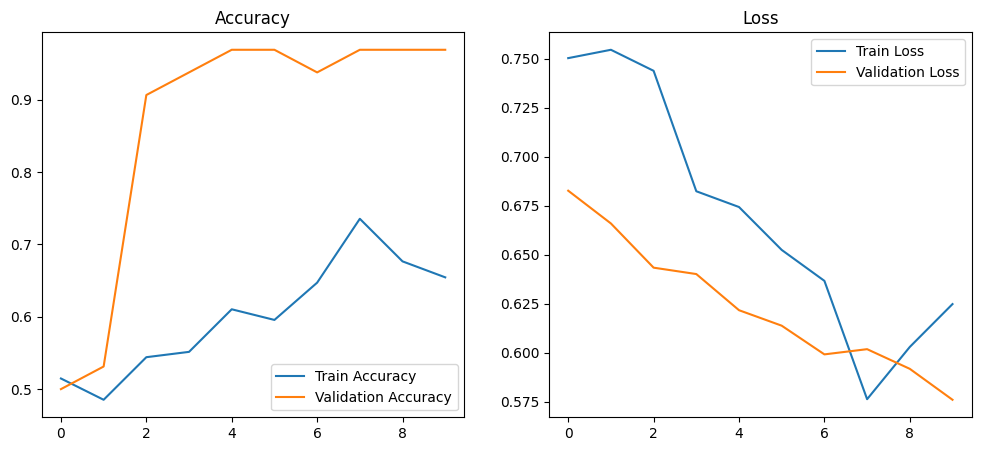

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.5334
Test Accuracy: 100.00%
